In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
data = pd.read_csv("telcoDataset.csv")

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
len(data.columns)

21

In [6]:
data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [7]:
## Making column names more uniform

data.columns = data.columns.str.lower().str.replace(' ','_')
categorical_columns = list(data.dtypes[data.dtypes == 'object'].index)

In [8]:
## Adding '_' between strings which contain spaces 

for c in categorical_columns:
    data[c] = data[c].str.lower().str.replace(' ','_')

In [9]:
data.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [10]:
data.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [11]:
## Changing the datatype of 'totalcharges' to float64

data['totalcharges'] = pd.to_numeric(data.totalcharges, errors='coerce')

data.totalcharges = data.totalcharges.fillna(0)

data.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [12]:
## Changing the value in churn column Yes:1 and No:0

data['churn'] = (data.churn == 'yes').astype('int64')

In [13]:
data['churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

### Setting Validation Framework

<img src="Classification/train_test_split.jpg" width=400 height=400 />

In [26]:
data_full_train, data_test = train_test_split(data,test_size=0.2, random_state = 1)

In [27]:
data_train, data_val = train_test_split(data_full_train,test_size=0.25, random_state = 1)

In [28]:
len(data_train), len(data_test), len(data_val)

(4225, 1409, 1409)

In [29]:
## Resetting the index to start from 0

data_train = data_train.reset_index(drop = True)
data_val = data_val.reset_index(drop = True)
data_test = data_test.reset_index(drop = True)

In [30]:
y_train = data_train['churn'].values
y_val = data_val['churn'].values
y_test = data_test['churn'].values

In [31]:
y_train

array([0, 0, 1, ..., 1, 0, 1])

In [32]:
del data_train['churn']
del data_val['churn']
del data_test['churn']

### Exploratory Data Analysis

In [33]:
data_full_train = data_full_train.reset_index(drop = True)

In [38]:
## Checking the null function

data_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [47]:
## Checking the distribution of target variable

data_full_train['churn'].value_counts(normalize = True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [50]:
global_churn_rate = data_full_train['churn'].mean()
round(global_churn_rate,2)

0.27

In [52]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [53]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [55]:
data_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

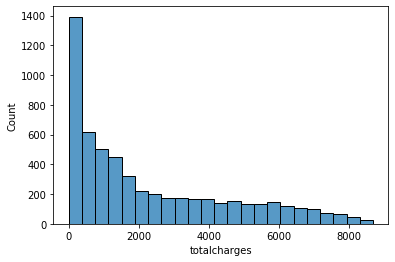

In [62]:
import seaborn as sns
sns.histplot(data_full_train['tenure'])

sns.histplot(data_full_train['monthlycharges'])

sns.histplot(data_full_train['totalcharges'])

### Feature Importance : Churn rate and risk ratio

Identifying which feature affect target variable
 1. Churn Rate
 2. Risk Ratio
 3. Mutual Information

In [66]:
### Churn rate for female

churn_female = data_full_train[data_full_train['gender']=='female']
churn_female['churn'].mean()

0.27682403433476394

In [67]:
### Churn rate for male

churn_male = data_full_train[data_full_train['gender']=='male']
churn_male['churn'].mean()

0.2632135306553911

Conclusion: No Significant relationship between gender and churn rate variable.

In [77]:
### Churn rate for people with partners

churn_partner = data_full_train[data_full_train['partner']=='yes']
churn_partner = churn_partner['churn'].mean()
churn_partner

0.20503330866025166

In [78]:
### Churn rate for people with partners

churn_no_partner = data_full_train[data_full_train['partner']=='no']
churn_no_partner = churn_no_partner['churn'].mean()
churn_no_partner

0.3298090040927694

Conclusion: There is Significant relationship between partner and churn rate variable.

In [79]:
global_churn_rate - churn_no_partner

-0.05984095297455855

In [80]:
## Risk Ratio

In [81]:
churn_no_partner/global_churn_rate

1.2216593879412643

In [82]:
churn_partner/global_churn_rate

0.7594724924338315

Conclusion - if churn ratio is greater than 1, then it is more likely to churn 
if churn ratio is less than 1, then it is less likely to churn 

In [83]:
data_full_train.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [86]:
for c in categorical: 
    data_group = data_full_train.groupby(c).churn.agg(['mean','count'])
    data_group['diff'] = data_group['mean'] - global_churn_rate
    data_group['risk'] = data_group['mean']/global_churn_rate
    display(data_group)

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121
